In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from autoeq.frequency_response import FrequencyResponse
from calibration import calibrate

In [3]:
DIR_PATH = Path().resolve()
AUTOEQ_PATH = DIR_PATH.parent.parent.joinpath('AutoEq')
DIR_PATH.joinpath('out').mkdir(parents=True, exist_ok=True)

In [4]:
harman = {
    'over-ear': FrequencyResponse.read_csv(AUTOEQ_PATH.joinpath('targets', 'Harman over-ear 2018 without bass.csv')),
    'in-ear': FrequencyResponse.read_csv(AUTOEQ_PATH.joinpath('targets', 'Harman in-ear 2019 without bass.csv'))
}
references = {
    'over-ear': [FrequencyResponse.read_csv(fp) for fp in AUTOEQ_PATH.joinpath('measurements', 'oratory1990', 'data', 'over-ear').glob('*.csv')],
    'in-ear': [FrequencyResponse.read_csv(fp) for fp in AUTOEQ_PATH.joinpath('measurements', 'oratory1990', 'data', 'in-ear').glob('*.csv')]
}
ie_ref_names = [fr.name for fr in references['in-ear']]
for fp in AUTOEQ_PATH.joinpath('measurements', 'crinacle', 'data', 'in-ear', '711').glob('*.csv'):
    if fp.name.replace('.csv', '') not in ie_ref_names:
        references['in-ear'].append(FrequencyResponse.read_csv(fp))
        ie_ref_names.append(fp.name.replace('.csv', ''))
references = {
    'over-ear': {fr.name: fr for fr in references['over-ear']},
    'in-ear': {fr.name: fr for fr in references['in-ear']},
}

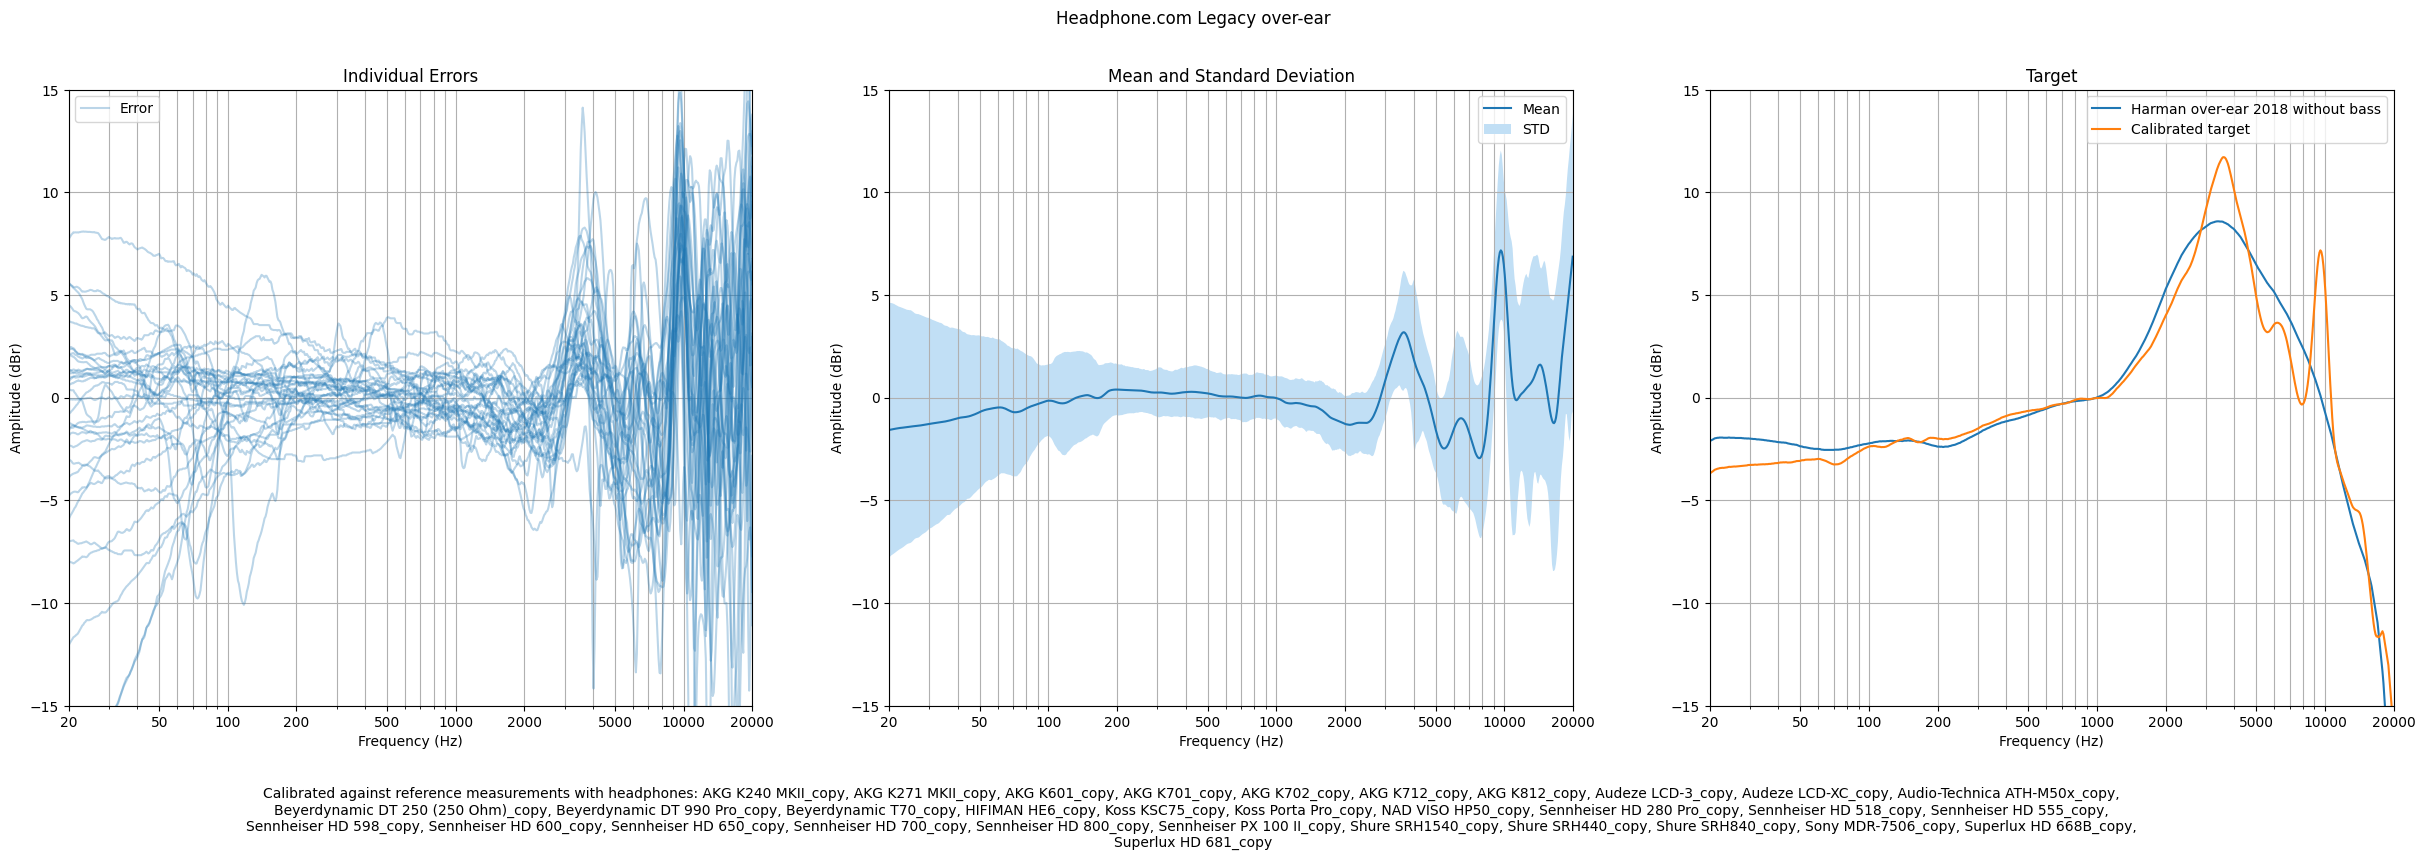

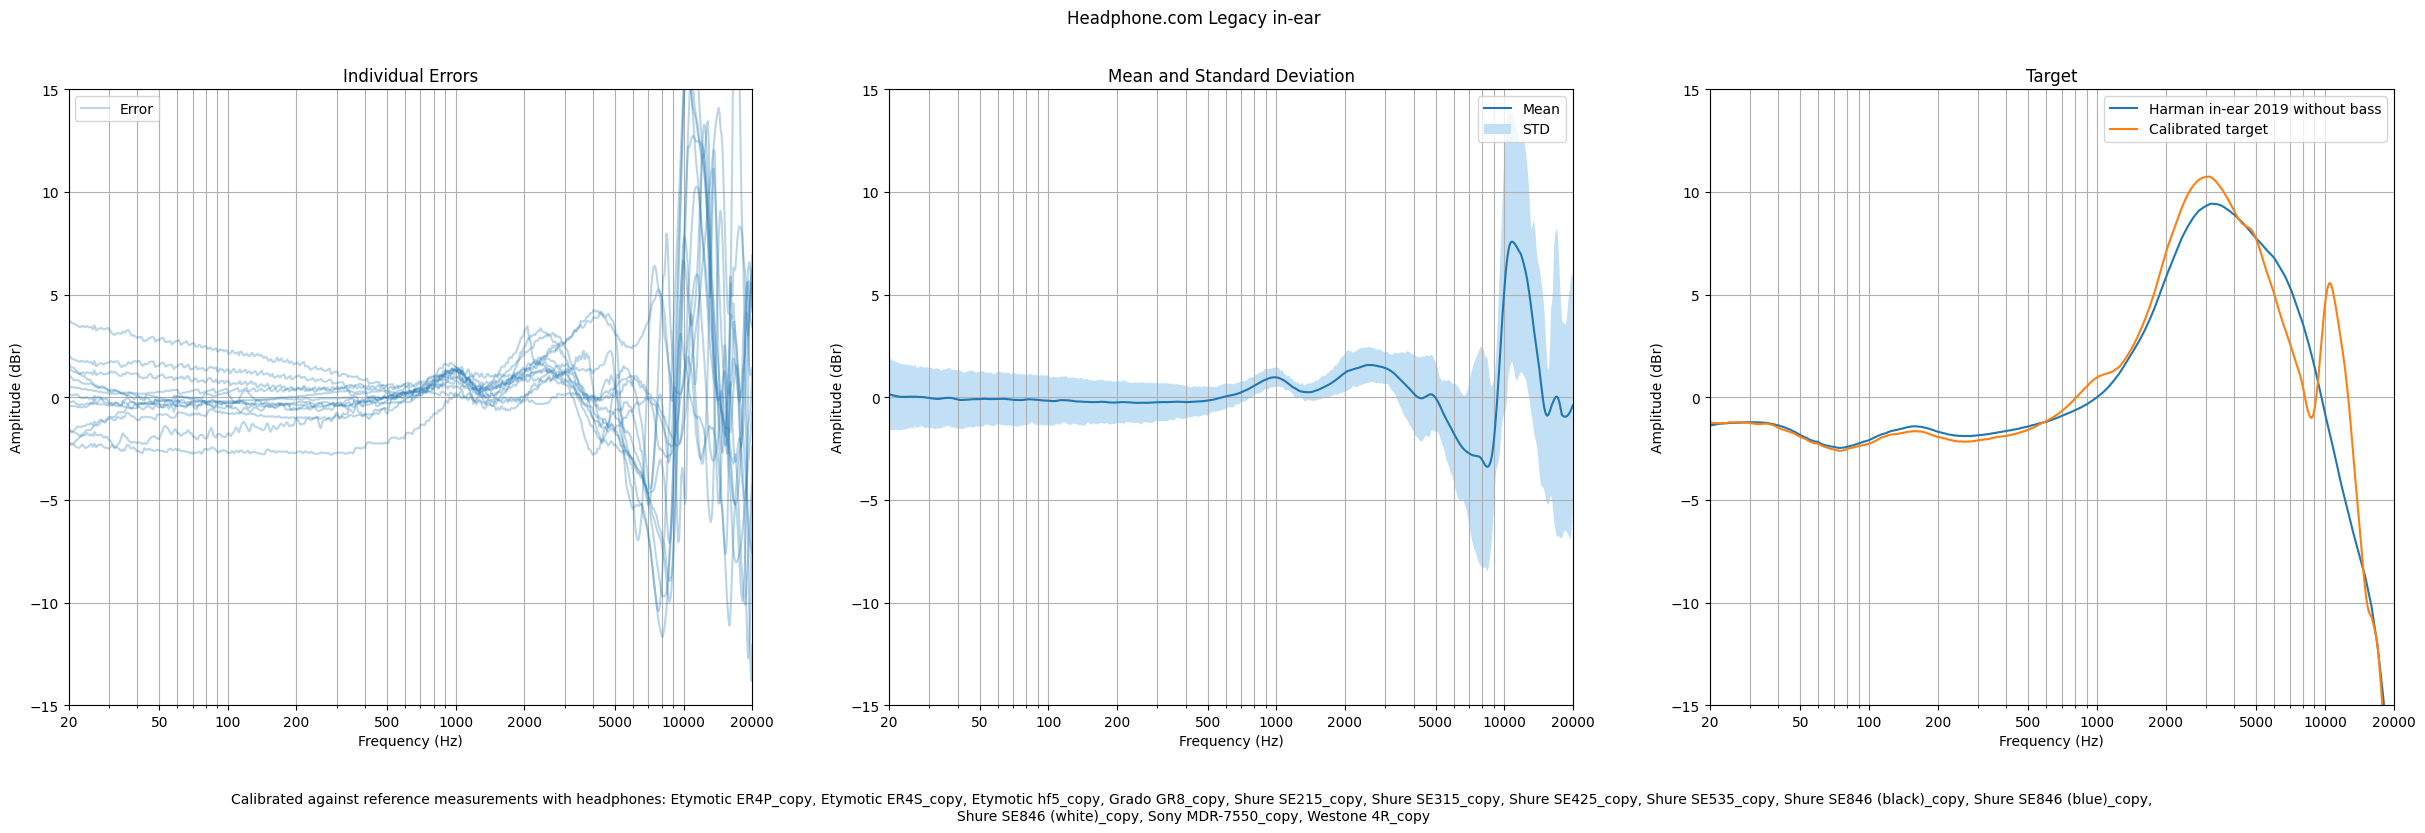

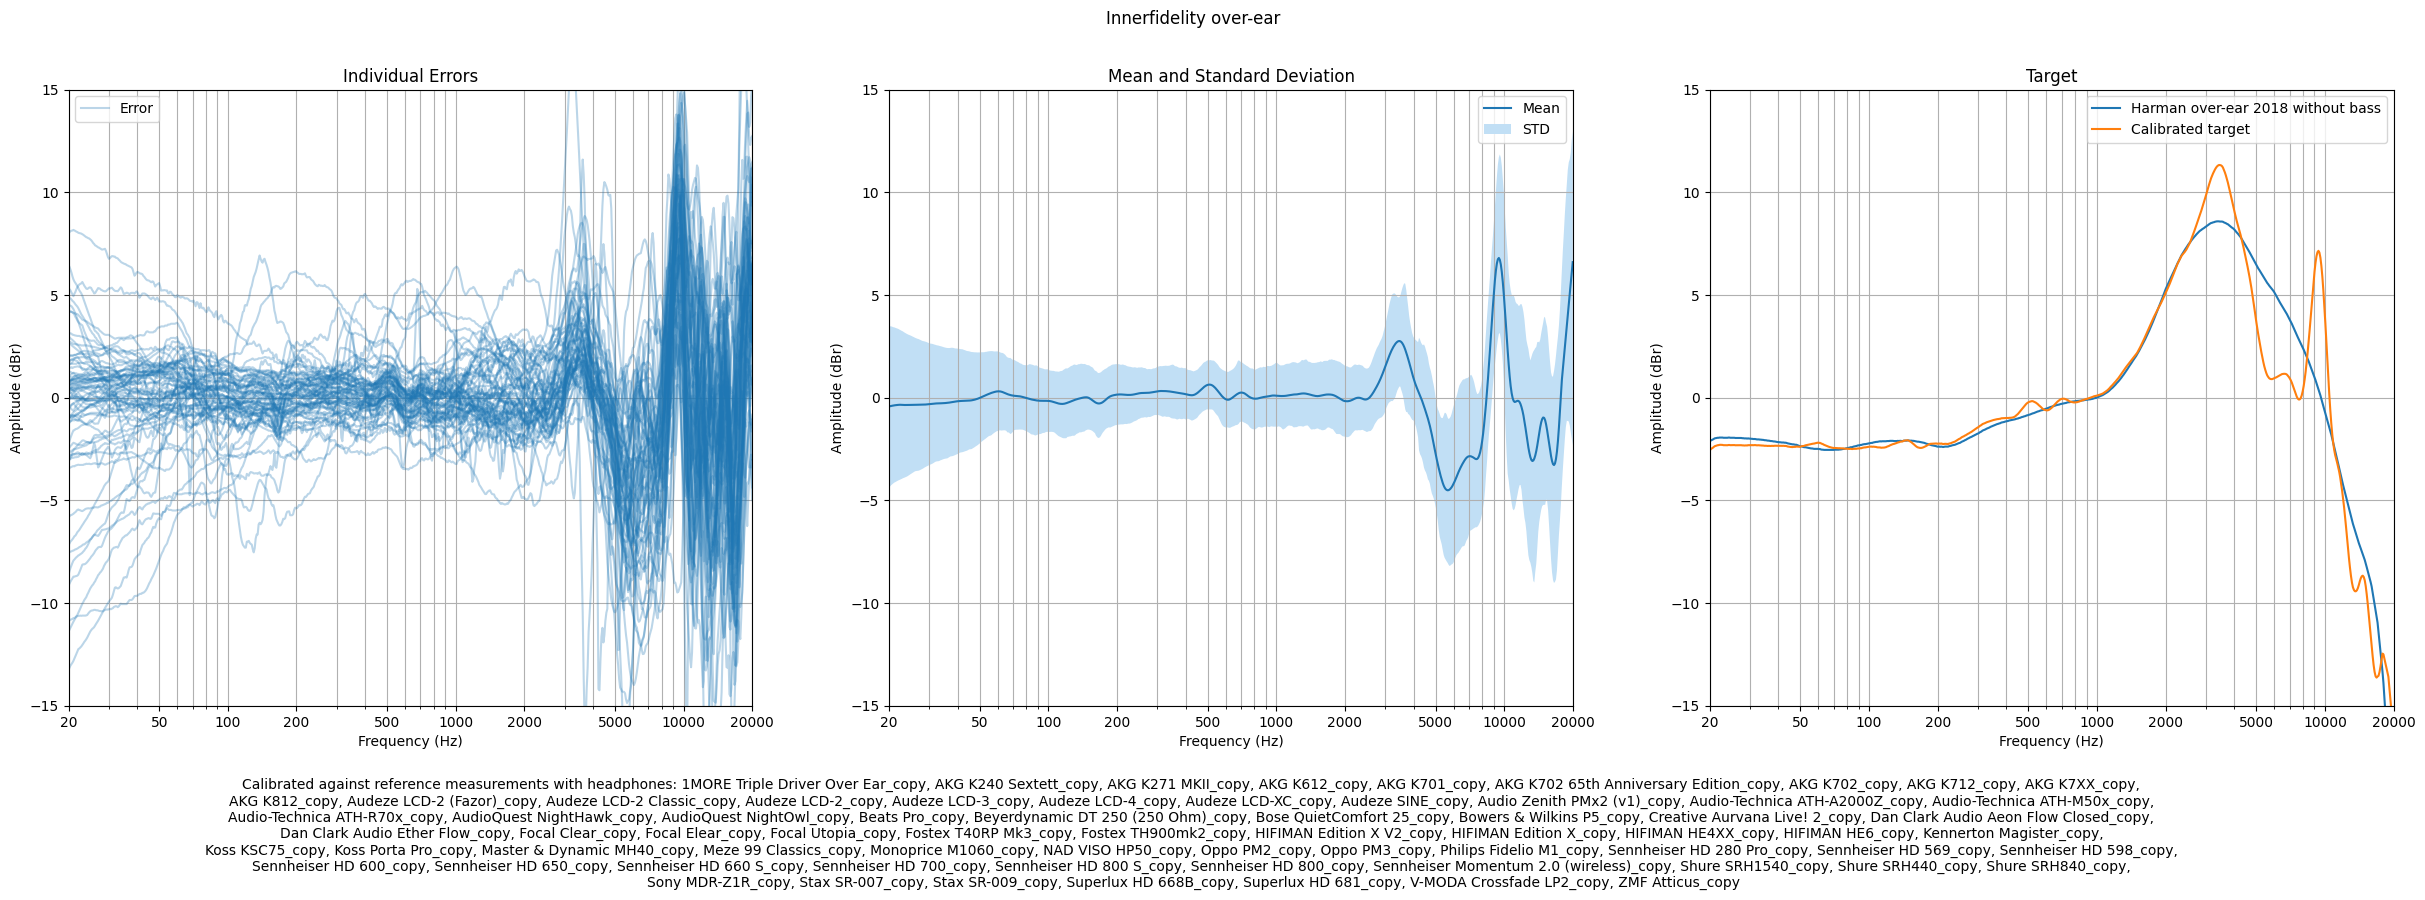

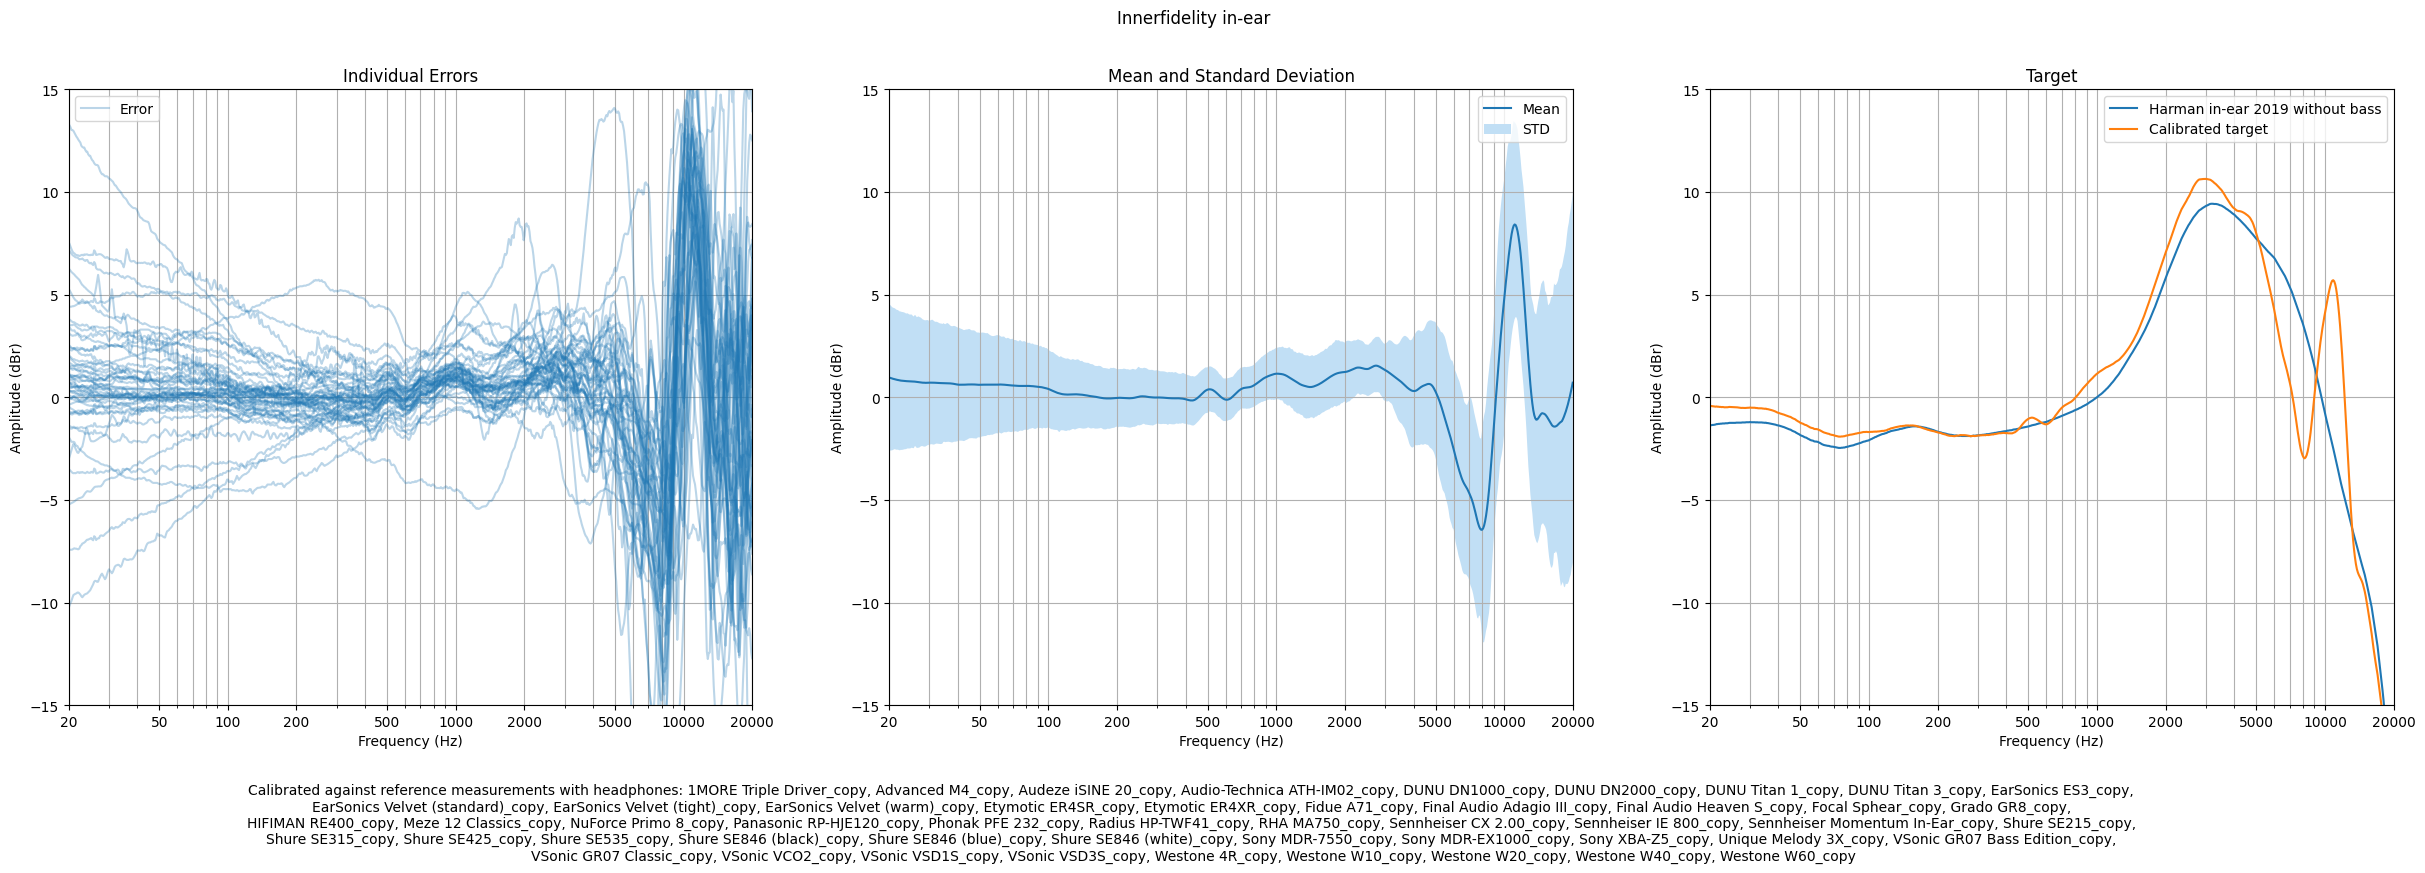

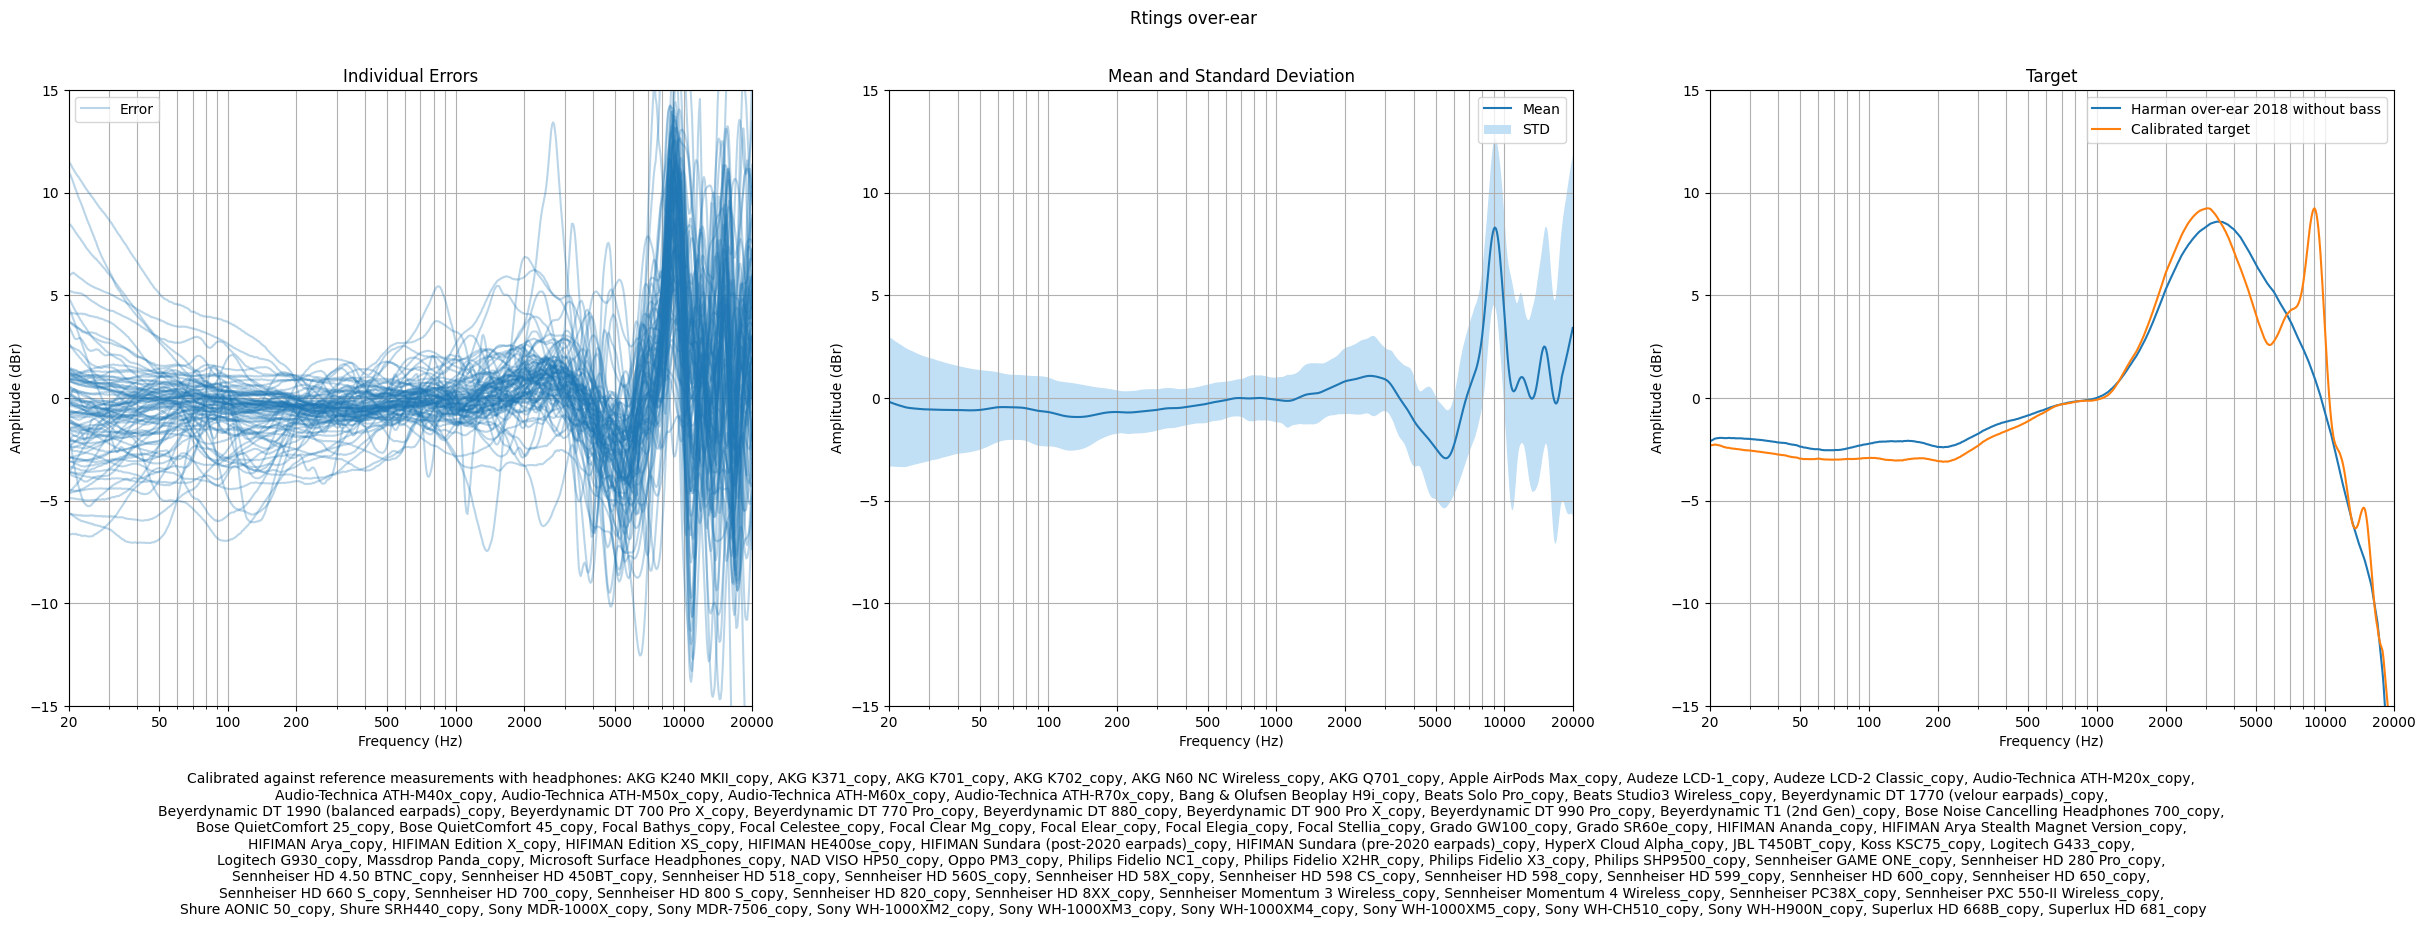

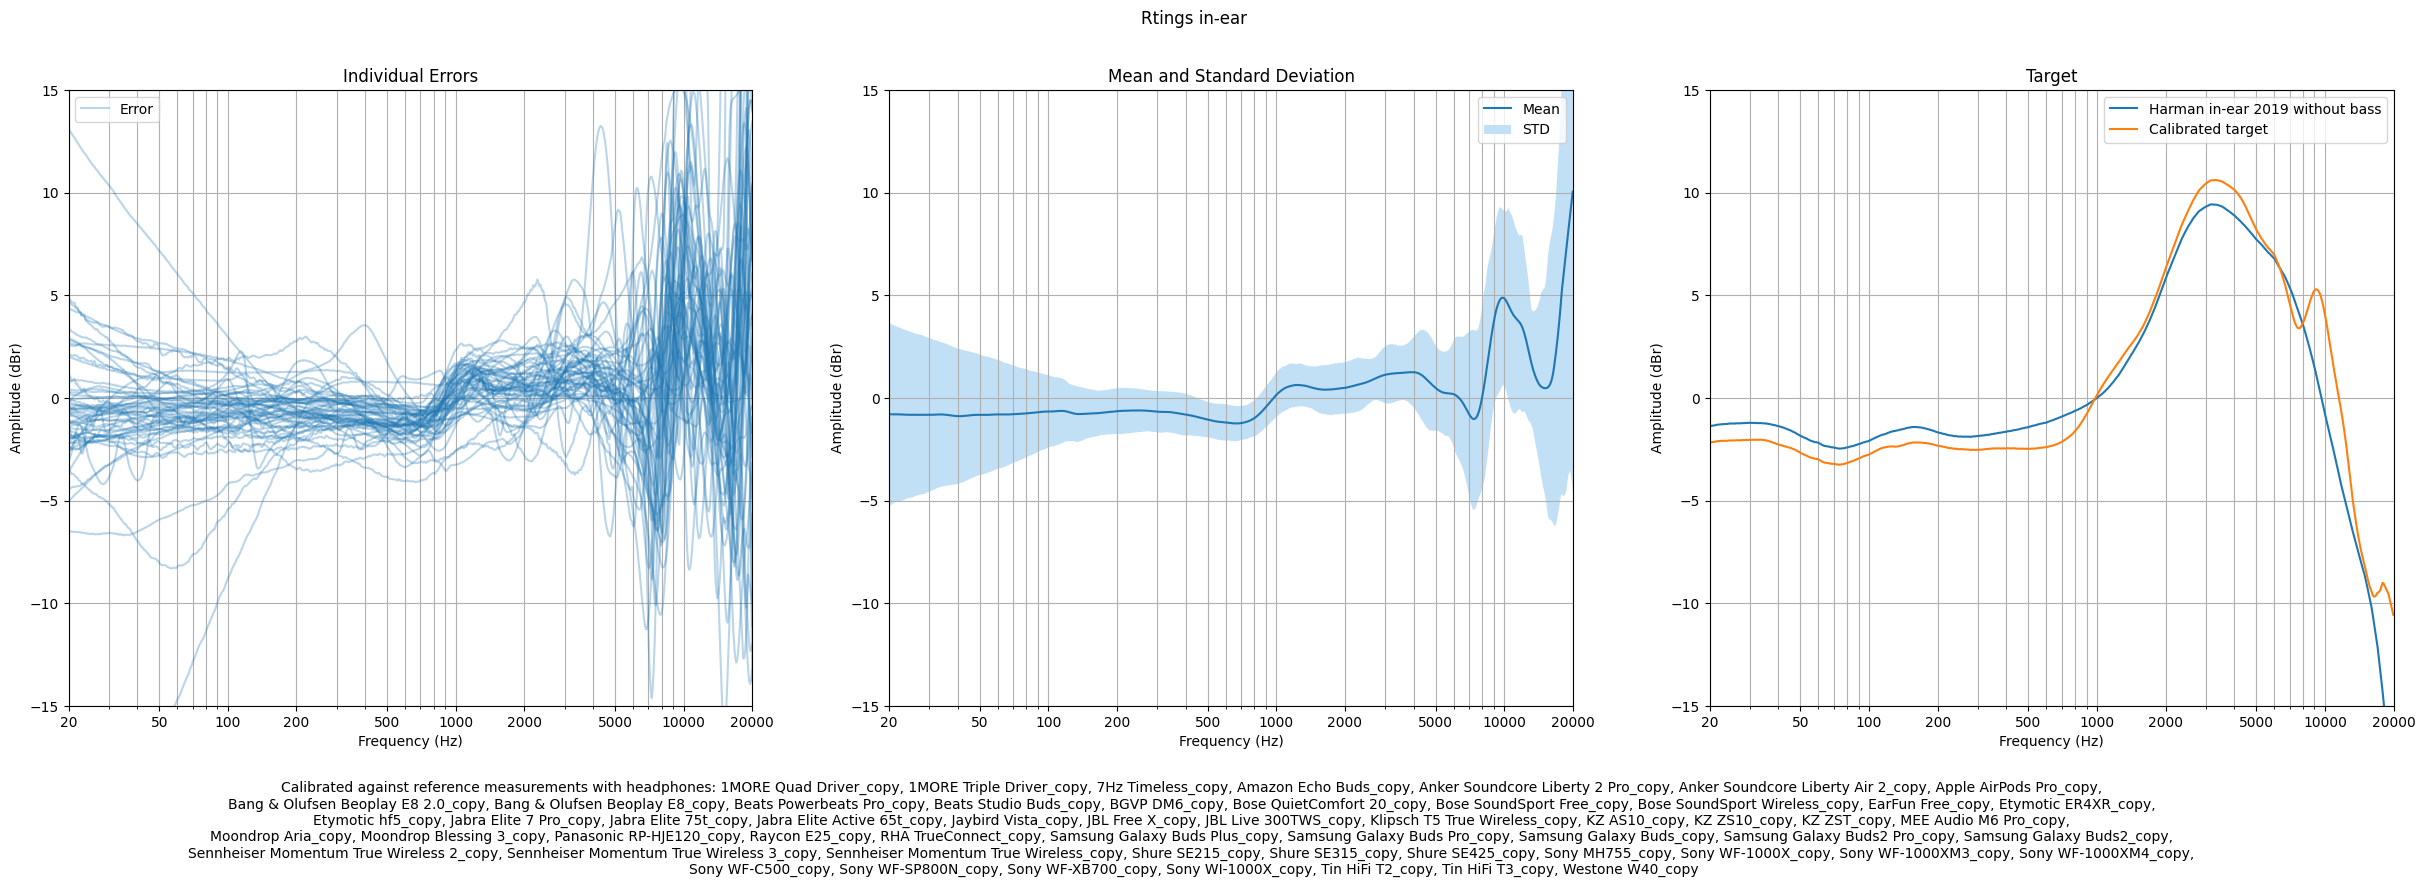

In [9]:
for db in ['Headphone.com Legacy', 'Innerfidelity', 'Rtings']:
    for form in ['over-ear', 'in-ear']:
        frs = [FrequencyResponse.read_csv(fp) for fp in AUTOEQ_PATH.joinpath('measurements', db, 'data', form).glob('*.csv')]
        errors, mean, calibrated_target, fig = calibrate(db, form, frs, references[form], harman[form])
        fig.savefig(DIR_PATH.joinpath('out', f'Calibration {db} {harman[form].name}.png'), bbox_inches='tight')
        calibrated_target.write_csv(DIR_PATH.joinpath('out', f'{db} {harman[form].name}.csv'))
        plt.show()
        plt.close(fig)